#### Objective 1: Import Data, Fill Missing Values, EDA

1. Read in `auto-mpg.csv`. Check the data types and values of each column. Cast `origin` as a text datatype. Are there any missing or unusual values?
2. Calculate summary statistics for each of the columns in the dataset, including min, max and mean. Then, build a histogram of the target variable, `mpg`.
3. Explore relationships between the features and the `mpg` column. Use scatterplots and build a correlation heatmap. Which column is most strongly correlated with `mpg`?

In [1]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv("auto-mpg.csv")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
mpg["origin"] = mpg["origin"].astype("object")

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [4]:
mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].mean())

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

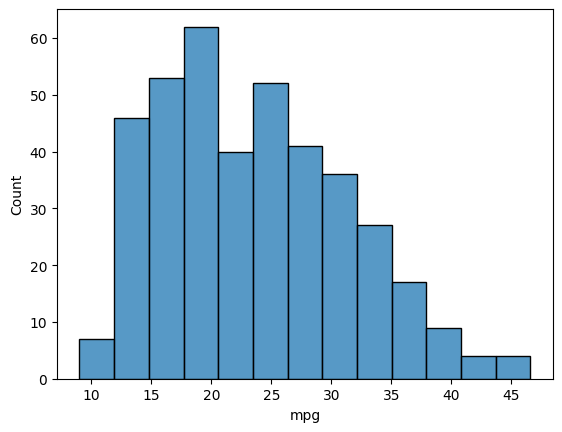

In [9]:
sns.histplot(mpg["mpg"])

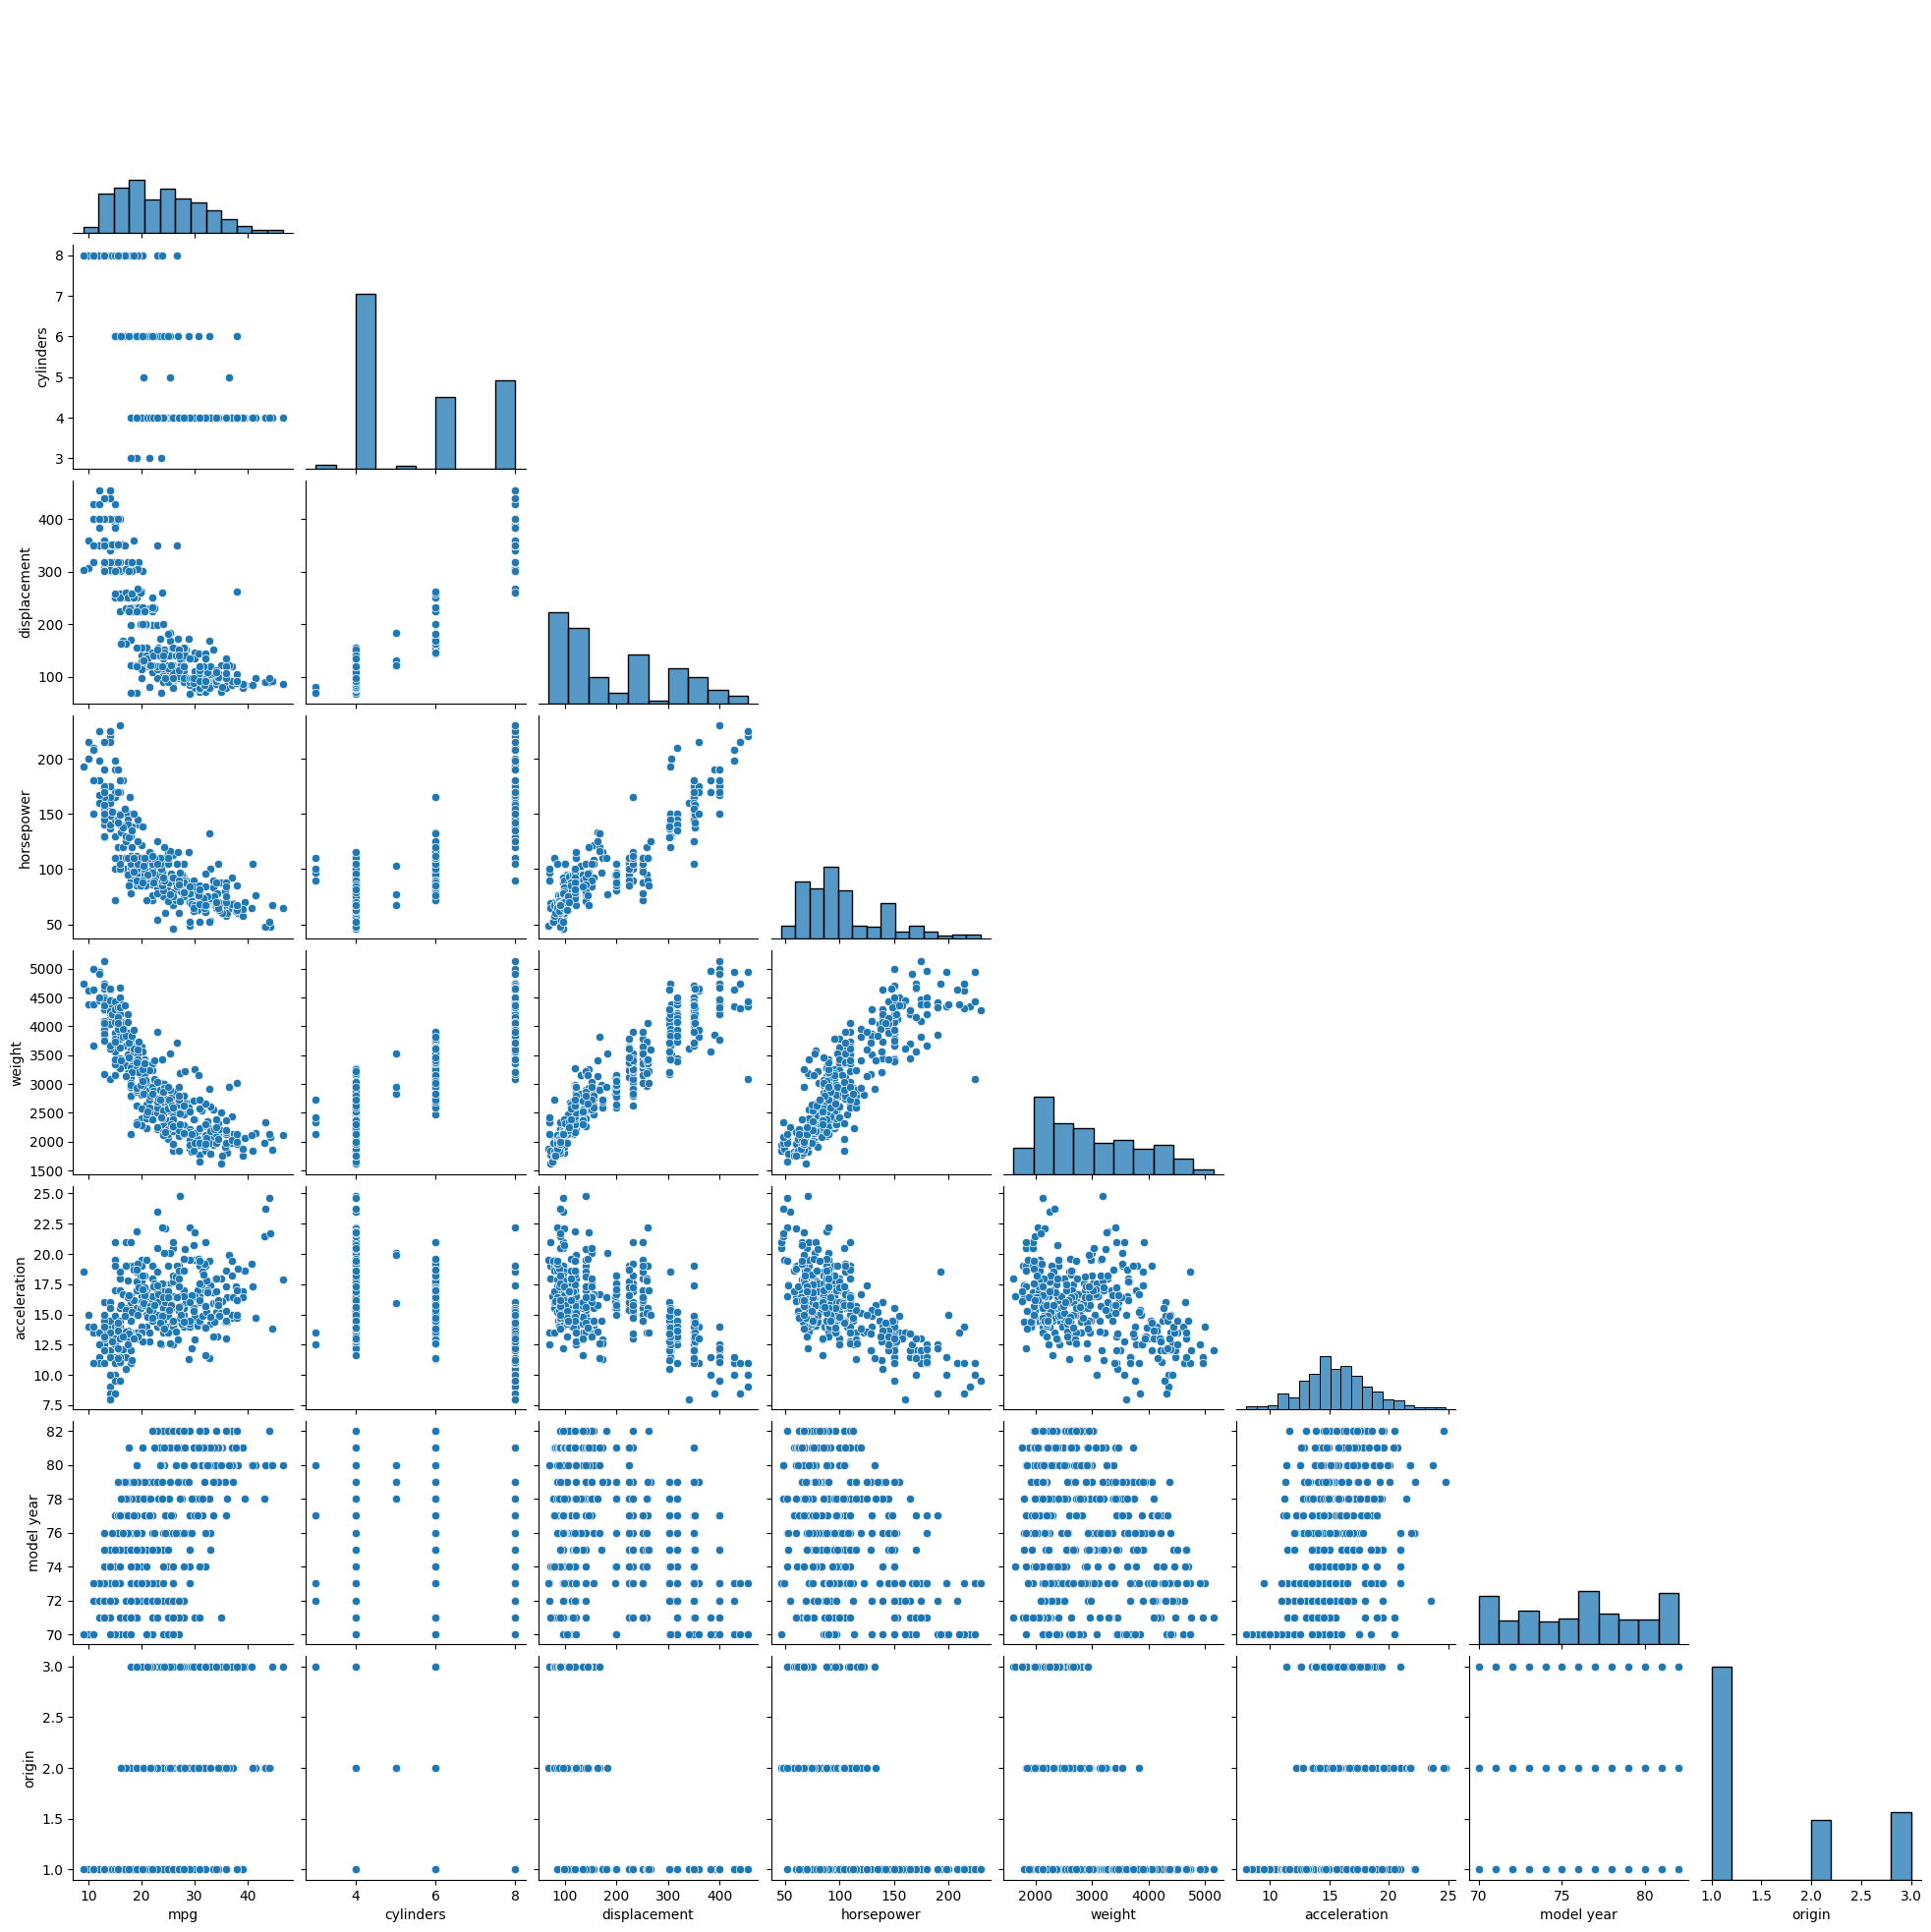

In [10]:
sns.pairplot(mpg, corner=True)

<Axes: xlabel='origin', ylabel='mpg'>

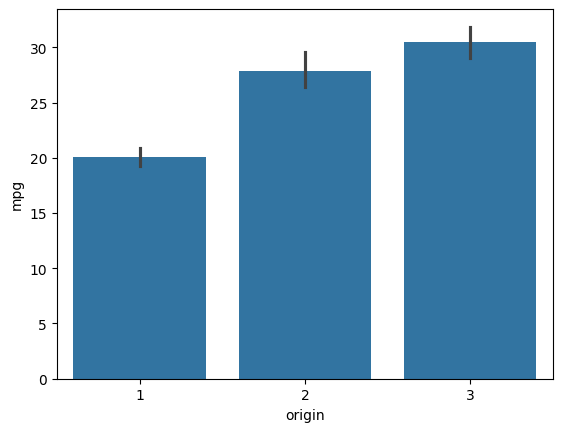

In [11]:
sns.barplot(data=mpg, x="origin", y="mpg")

In [12]:
mpg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

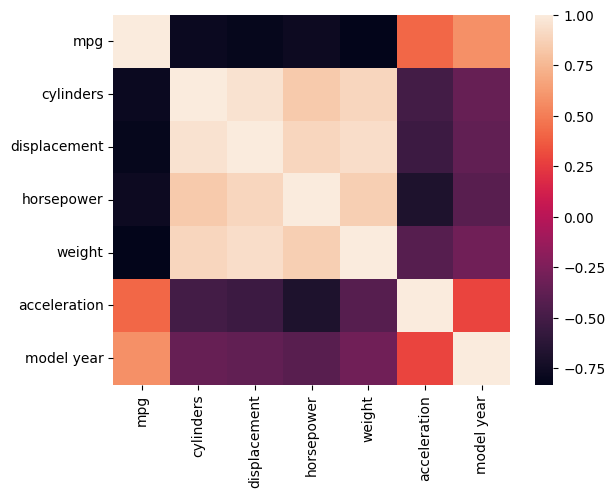

In [13]:
sns.heatmap(mpg.corr(numeric_only=True))

<Axes: >

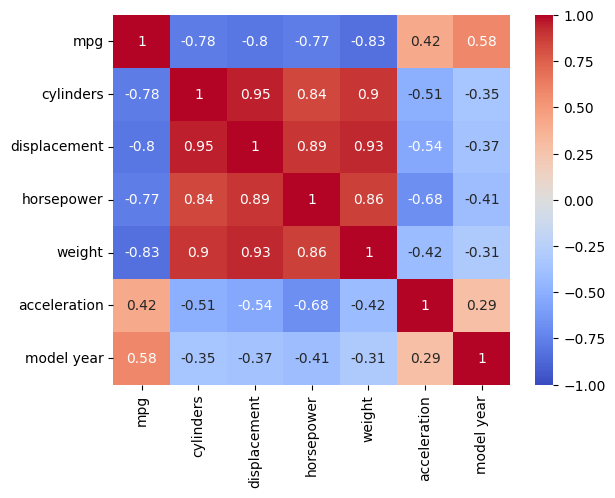

In [14]:
sns.heatmap(
    mpg.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True
)

#### Objective 2: Split the Data and Train a Model

1. Split the data into train and test, then set up a validation scheme of your choice.
2. Fit a baseline regression model using the feature with the strongest correlation to the target, `mpg`.
3. Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way.

In [51]:
mpg_model = mpg.assign(
    weight2 = mpg["weight"] ** 2,
    weight3 = mpg["weight"] ** 3,
    accel2 = mpg["acceleration"] ** 2,
    accel3 = mpg["acceleration"] ** 3,
    hp2 = mpg["horsepower"] ** 2,
    hp3 = mpg["horsepower"] ** 3,
).drop("car name", axis=1)

mpg_model = pd.get_dummies(mpg_model, drop_first=True)

In [52]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,accel2,accel3,hp2,hp3,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,1728.000,16900.0,2197000.0,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,1520.875,27225.0,4492125.0,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,1331.000,22500.0,3375000.0,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,1728.000,22500.0,3375000.0,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,1157.625,19600.0,2744000.0,False,False


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

features = [
    "weight",
    "weight2",
    "cylinders",
    "displacement",
    "horsepower",
    "hp2",
    "hp3",
    "acceleration",
    "accel2",
    "accel3",
    "model year",
    "origin_2",
    "origin_3"
]

X = sm.add_constant(mpg_model[features])
y = mpg_model["mpg"]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm
import numpy as np

# Add constant (intercept term) before splitting
X = sm.add_constant(X)  # Adds intercept term
X = X.astype(float)
y = y.astype(float)

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Ensure all subsets are numeric (protects against object dtypes sneaking in)
    X_train = X_train.astype(float)
    y_train = y_train.astype(float)
    X_val = X_val.astype(float)
    y_val = y_val.astype(float)
    
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.889, 0.865, 0.842, 0.848, 0.859]
Cross Val R2s: 0.86 +- 0.016
All Validation MAEs:  [1.822, 2.121, 2.325, 2.099, 2.314]
Cross Val MAEs: 2.136 +- 0.183


In [55]:
def residual_analysis_plots(model):

    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

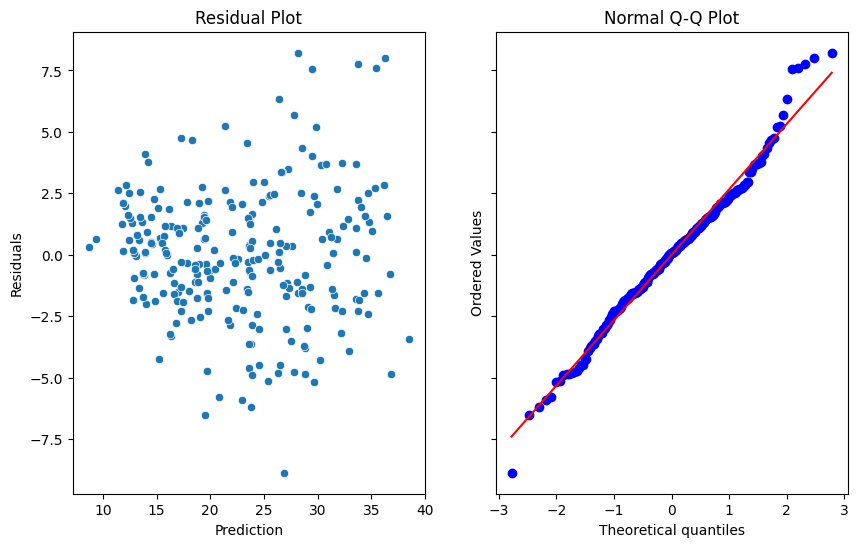

In [56]:
residual_analysis_plots(model)

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          8.02e-101
Time:                        16:30:00   Log-Likelihood:                -611.13
No. Observations:                 255   AIC:                             1250.
Df Residuals:                     241   BIC:                             1300.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.3186     15.696      1.613      0.108      -5.600      56.237
weight          -0.0164      0.003     -5.699      0.000      -0.022      -0.011
weight2       1.842e-06   4.08e-07      4.515      0.000    1.04e-06    2.65e-06
cylinders        0.1240      0.375      0.331      0.741      -0.614       0.862
displacement    -0.0030      0.009     -0.322      0.748      -0.021       0.015
horsepower      -0.1518      0.138     -1.099      0.273      -0.424       0.120
hp2              0.0005      0.001      0.512      0.609      -0.002       0.003
hp3          -5.706e-07   2.46e-06     -0.232      0.817   -5.42e-06    4.28e-06
acceleration    -3.4809      2.765     -1.259      0.209      -8.928       1.966
accel2           0.1531      0.170      0.898      0.370      -0.183       0.489
accel3          -0.0022      0.003     -0.622      0.535      -0.009       0.005
model year       0.8394      0.054     15.513      0.000       0.733       0.946
origin_2         1.3994      0.630      2.220      0.027       0.157       2.641
origin_3         0.7888      0.619      1.274      0.204      -0.431       2.009
==============================================================================
Omnibus:                        6.296   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                8.811
Skew:                           0.131   Prob(JB):                       0.0122
Kurtosis:                       3.872   Cond. No.                     1.09e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          1.60e-130
Time:                        16:30:01   Log-Likelihood:                -775.80
No. Observations:                 318   AIC:                             1580.
Df Residuals:                     304   BIC:                             1632.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0776     14.159      0.924      0.356     -14.785      40.940
weight          -0.0167      0.003     -6.320      0.000      -0.022      -0.012
weight2       1.891e-06   3.77e-07      5.013      0.000    1.15e-06    2.63e-06
cylinders        0.2441      0.351      0.695      0.488      -0.447       0.935
displacement    -0.0060      0.009     -0.682      0.496      -0.023       0.011
horsepower      -0.1220      0.123     -0.989      0.323      -0.365       0.121
hp2              0.0003      0.001      0.285      0.776      -0.002       0.002
hp3           1.504e-07   2.28e-06      0.066      0.948   -4.34e-06    4.64e-06
acceleration    -0.7738      2.467     -0.314      0.754      -5.628       4.080
accel2          -0.0383      0.150     -0.255      0.799      -0.334       0.257
accel3           0.0022      0.003      0.724      0.469      -0.004       0.008
model year       0.8319      0.050     16.504      0.000       0.733       0.931
origin_2         1.1942      0.588      2.032      0.043       0.038       2.351
origin_3         1.1885      0.559      2.125      0.034       0.088       2.289
==============================================================================
Omnibus:                       19.706   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.738
Skew:                           0.293   Prob(JB):                     5.24e-10
Kurtosis:                       4.698   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Objective 3: Score on Test - report R2, and MAE

1. Score your final model on the test set - calculating both R2 and MAE. If your test R2 is less than .75, go back to the modelling process.
2. Interpret your model - what impact does a one year increase in model year have on the predicted fuel efficiency?

In [59]:
print(f"Test R2: {r2(y_val, model.predict(X_val),)}")
print(f"Test MAE: {mae(y_val, model.predict(X_val),)}")

Test R2: 0.8771220538873026
Test MAE: 2.1757531665728953


#### Challenge - Ridge Regression

1. Repeat the modelling process using ridge regression - is model fit better?

In [60]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [61]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_m, y)

print(ridge_model.score(X_m, y))
print(mae(y, ridge_model.predict(X_m)))
print(ridge_model.alpha_)

0.8782483046702607
2.05947919537469
0.11226677735108136


In [62]:
print(f"Test R2: {r2(y_test, ridge_model.predict(X_te))}")
print(f"Test MAE: {mae(y_test, ridge_model.predict(X_te))}")

Test R2: 0.8116304666558132
Test MAE: 2.221056603184902
